# ***Arboles de decision - Decision Tree***

**Ejercicio Loan Repayment Prediction**

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 11

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Repayment_Prediction.csv to Loan_Repayment_Prediction.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split



In [3]:
dataset_LRP = pd.read_csv("Loan_Repayment_Prediction.csv")

In [4]:
dataset_LRP.head()

,Initial_payment,Last_payment,Credit_score,House_number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [6]:
dataset_LRP.shape

(1000, 5)

In [8]:
dataset_LRP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Initial_payment  1000 non-null   int64 
 1   Last_payment     1000 non-null   int64 
 2   Credit_score     1000 non-null   int64 
 3   House_number     1000 non-null   int64 
 4   Result           1000 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [9]:
dataset_LRP.describe()

,Initial_payment,Last_payment,Credit_score,House_number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


In [10]:
dataset_LRP["Result"].value_counts().to_frame()

,count
Result,
No,521
yes,479


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

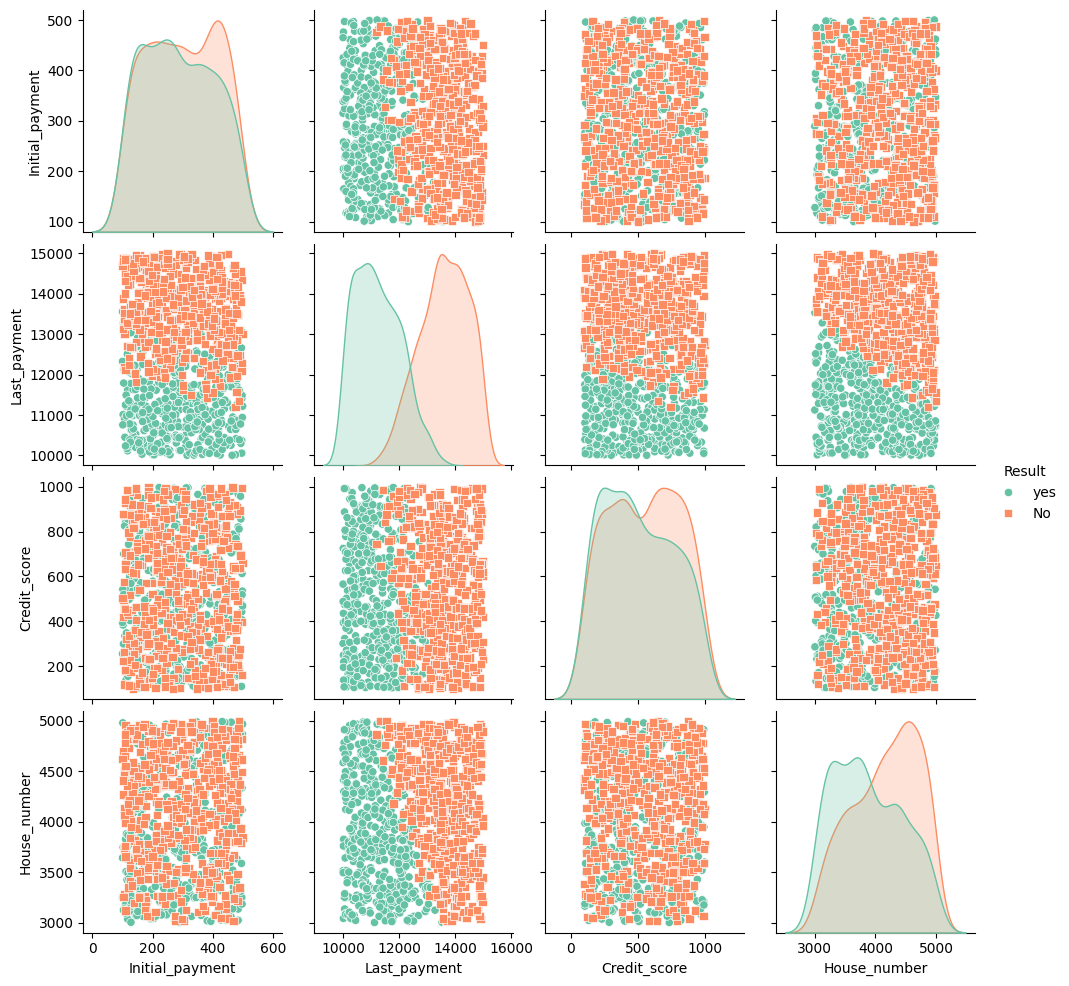

In [11]:
sns.pairplot(dataset_LRP, hue="Result", markers=["o", "s", "D"], palette="Set2")

In [14]:
X = dataset_LRP.values[:, 0:4]
y = dataset_LRP.values[:,4]

In [15]:
print(X)

[[201 10018 250 3046]
 [205 10016 395 3044]
 [257 10129 109 3251]
 ...
 [316 14872 613 4760]
 [305 14926 897 4572]
 [168 14798 834 4937]]


In [17]:
X.shape

(1000, 4)

In [16]:
print(y)

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'y

In [18]:
y.shape

(1000,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [24]:
y_pred = tree.predict(X_test)
y_pred

array(['No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes', 'yes', 'yes',
       'No', 'yes', 'No', 'No', 'No', 'yes', 'No', 'No', 'No', 'yes',
       'No', 'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'yes',
       'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes',
       'No', 'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'No',
       'No', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', '

In [25]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
cm_tree_1= confusion_matrix(y_test, y_pred)

print(cm_tree_1)

[[139  17]
 [ 12 132]]


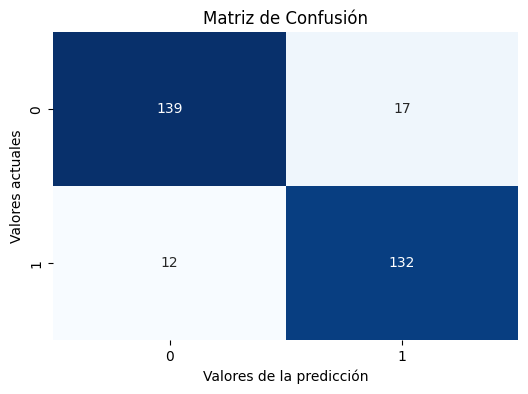

In [27]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

In [32]:
print ("Accuracy / Exactitud es " +str(accuracy_score(y_test,y_pred)*100) + " %")

Accuracy / Exactitud es 90.33333333333333 %


In [34]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [35]:
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['yes',
                                        'No'],
                           feature_names=['Initial_payment',
                                          'Last_payment','Credit_score','House_number'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [37]:
from IPython.display import Image

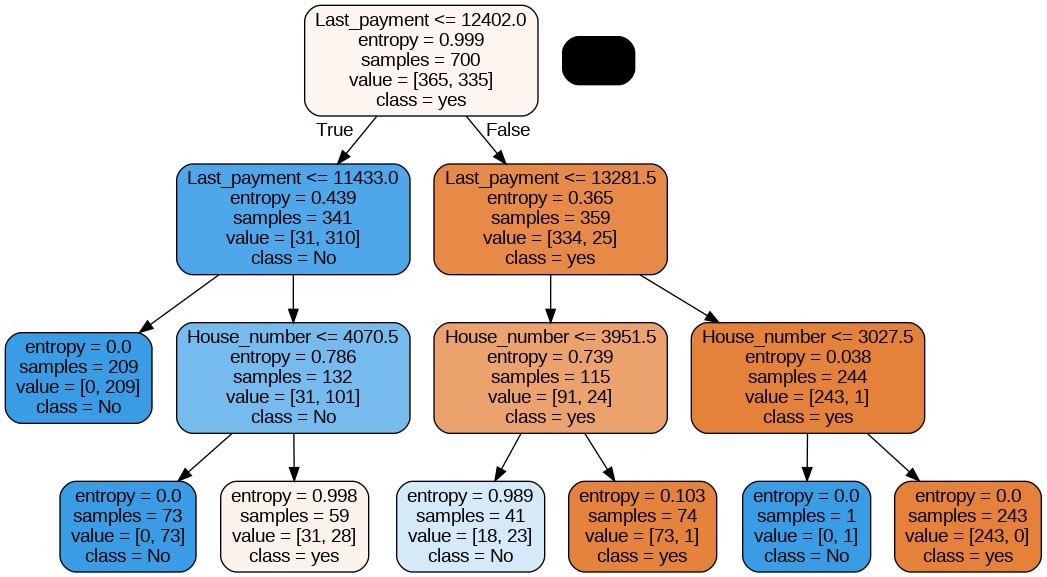

In [38]:
Image(filename='tree.png', width=600)